# **Breast Cancer Classification with Supervised Learning**

This notebook implements and compares different supervised learning algorithms on the breast cancer dataset from scikit-learn.

# **1. Loading and Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
np.random.seed(42)

In [3]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [4]:
# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

In [5]:
# Display basic information about the dataset
print(f"Dataset dimensions: {df.shape}")
print(f"Target classes: {cancer.target_names}")
print(f"Class distribution: {pd.Series(y).value_counts()}")

Dataset dimensions: (569, 31)
Target classes: ['malignant' 'benign']
Class distribution: 1    357
0    212
Name: count, dtype: int64


In [6]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


In [7]:
# Brief view of dataset
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# ### **Preprocessing Steps**

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (426, 30)
Testing set shape: (143, 30)


In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Brief explanation of preprocessing
print("\nPreprocessing Steps Performed:")
print("1. Checked for missing values - None found in this dataset")
print("2. Split dataset into training (75%) and testing (25%) sets")
print("3. Applied StandardScaler to normalize features")
print("   - This is necessary because features are measured in different units")
print("   - Normalization helps algorithms like SVM, Logistic Regression, and KNN that are sensitive to feature scales")
print("   - Each feature now has mean=0 and variance=1")


Preprocessing Steps Performed:
1. Checked for missing values - None found in this dataset
2. Split dataset into training (75%) and testing (25%) sets
3. Applied StandardScaler to normalize features
   - This is necessary because features are measured in different units
   - Normalization helps algorithms like SVM, Logistic Regression, and KNN that are sensitive to feature scales
   - Each feature now has mean=0 and variance=1


# ## **2. Classification Algorithm Implementation**


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.9650
Training and prediction time: 0.0191 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



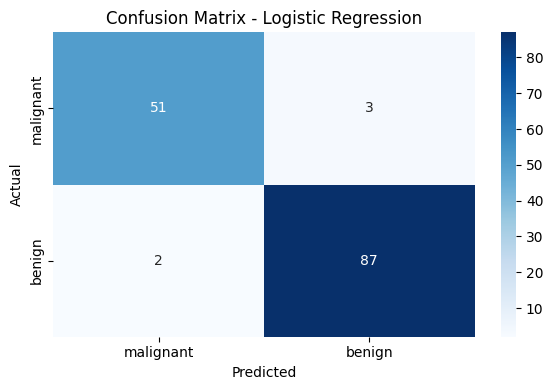

In [28]:
# List to store results
results = []


def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate training time
    train_time = time.time() - start_time

    # Append results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Time (s)': train_time
    })

    # Return the calculated values
    return name, accuracy, train_time, y_pred

#creating a model object
model = LogisticRegression()

# Evaluate the model using the evaluate_model function and unpack the returned values
name, accuracy, train_time, y_pred = evaluate_model('Logistic Regression', model, X_train, X_test, y_train, y_test)

# Print results
print(f"\n{name} Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Training and prediction time: {train_time:.4f} seconds")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) #Fixed: Removed extra indentation
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {name}')
plt.tight_layout()
plt.show()

# ### **1. Logistic Regression**

In [29]:
print("\n" + "="*50)
print("1. Logistic Regression")
print("="*50)
print("""
Logistic Regression is a linear model for binary classification that estimates the probability
of an instance belonging to a particular class. It's suitable for this dataset because:
- It works well with binary classification problems (malignant vs. benign)
- It's effective when the relationship between features and outcome is approximately linear
- It provides interpretable coefficients that can indicate feature importance
- It's less prone to overfitting compared to more complex models
""")

lr_model = evaluate_model('Logistic Regression',
                          LogisticRegression(max_iter=1000, random_state=42),
                          X_train_scaled, X_test_scaled, y_train, y_test)



1. Logistic Regression

Logistic Regression is a linear model for binary classification that estimates the probability
of an instance belonging to a particular class. It's suitable for this dataset because:
- It works well with binary classification problems (malignant vs. benign)
- It's effective when the relationship between features and outcome is approximately linear
- It provides interpretable coefficients that can indicate feature importance
- It's less prone to overfitting compared to more complex models



# ### **2. Decision Tree**

In [30]:
print("\n" + "="*50)
print("2. Decision Tree Classifier")
print("="*50)
print("""
Decision Tree is a non-parametric model that creates a tree-like structure of decisions.
It's suitable for this dataset because:
- It can capture non-linear relationships between features
- It's capable of handling both numerical and categorical features
- It doesn't require feature scaling (though we're using scaled features for consistency)
- It provides feature importance measures and is highly interpretable
- It can model complex interactions between features
""")

dt_model = evaluate_model('Decision Tree',
                         DecisionTreeClassifier(random_state=42),
                         X_train_scaled, X_test_scaled, y_train, y_test)



2. Decision Tree Classifier

Decision Tree is a non-parametric model that creates a tree-like structure of decisions.
It's suitable for this dataset because:
- It can capture non-linear relationships between features
- It's capable of handling both numerical and categorical features
- It doesn't require feature scaling (though we're using scaled features for consistency)
- It provides feature importance measures and is highly interpretable
- It can model complex interactions between features



# ### **3. Random Forest**

In [31]:
print("\n" + "="*50)
print("3. Random Forest Classifier")
print("="*50)
print("""
Random Forest is an ensemble method that builds multiple decision trees and merges their predictions.
It's suitable for this dataset because:
- It reduces overfitting compared to a single decision tree
- It can handle high-dimensional data with many features
- It provides feature importance measures
- It's robust to outliers and non-linear patterns
- It generally performs well without extensive hyperparameter tuning
""")

rf_model = evaluate_model('Random Forest',
                         RandomForestClassifier(n_estimators=100, random_state=42),
                         X_train_scaled, X_test_scaled, y_train, y_test)


3. Random Forest Classifier

Random Forest is an ensemble method that builds multiple decision trees and merges their predictions.
It's suitable for this dataset because:
- It reduces overfitting compared to a single decision tree
- It can handle high-dimensional data with many features
- It provides feature importance measures
- It's robust to outliers and non-linear patterns
- It generally performs well without extensive hyperparameter tuning



# ### **4. Support Vector Machine**

In [32]:
print("\n" + "="*50)
print("4. Support Vector Machine (SVM)")
print("="*50)
print("""
SVM is a powerful algorithm that finds an optimal hyperplane to separate classes.
It's suitable for this dataset because:
- It's effective in high-dimensional spaces
- It works well when the number of features is greater than the number of samples
- It's memory efficient as it uses only a subset of training points (support vectors)
- With kernel tricks, it can capture non-linear decision boundaries
- It's particularly effective for binary classification problems
""")

svm_model = evaluate_model('SVM',
                          SVC(kernel='rbf', probability=True, random_state=42),
                          X_train_scaled, X_test_scaled, y_train, y_test)


4. Support Vector Machine (SVM)

SVM is a powerful algorithm that finds an optimal hyperplane to separate classes.
It's suitable for this dataset because:
- It's effective in high-dimensional spaces
- It works well when the number of features is greater than the number of samples
- It's memory efficient as it uses only a subset of training points (support vectors)
- With kernel tricks, it can capture non-linear decision boundaries
- It's particularly effective for binary classification problems



# ### **5. k-Nearest Neighbors**

In [33]:
print("\n" + "="*50)
print("5. k-Nearest Neighbors (k-NN)")
print("="*50)
print("""
k-NN is a simple, instance-based learning algorithm that classifies instances based on
the majority class of their k nearest neighbors. It's suitable for this dataset because:
- It's non-parametric and makes no assumptions about the underlying data distribution
- It's effective when decision boundaries are irregular
- It's intuitive and easy to implement
- It works well when training data is representative of the entire dataset
- Feature scaling is crucial for k-NN (which we've already performed)
""")

knn_model = evaluate_model('k-NN',
                          KNeighborsClassifier(n_neighbors=5),
                          X_train_scaled, X_test_scaled, y_train, y_test)


5. k-Nearest Neighbors (k-NN)

k-NN is a simple, instance-based learning algorithm that classifies instances based on
the majority class of their k nearest neighbors. It's suitable for this dataset because:
- It's non-parametric and makes no assumptions about the underlying data distribution
- It's effective when decision boundaries are irregular
- It's intuitive and easy to implement
- It works well when training data is representative of the entire dataset
- Feature scaling is crucial for k-NN (which we've already performed)



# ## **3. Model Comparison**

In [34]:
# Create a DataFrame with results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.sort_values('Accuracy', ascending=False))


Model Performance Comparison:
                 Model  Accuracy  Time (s)
1  Logistic Regression  0.979021  0.006259
4                  SVM  0.972028  0.023682
0  Logistic Regression  0.965035  0.019119
3        Random Forest  0.965035  0.172970
5                 k-NN  0.958042  0.041990
2        Decision Tree  0.951049  0.011613


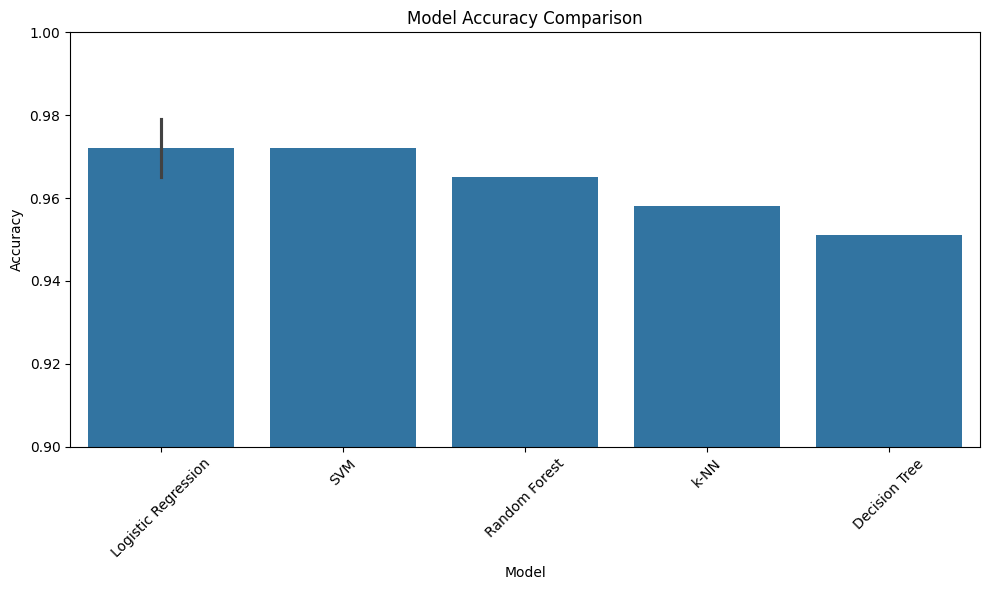

In [35]:
# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df.sort_values('Accuracy', ascending=False))
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)  # Adjusting y-limit for better visualization of differences
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

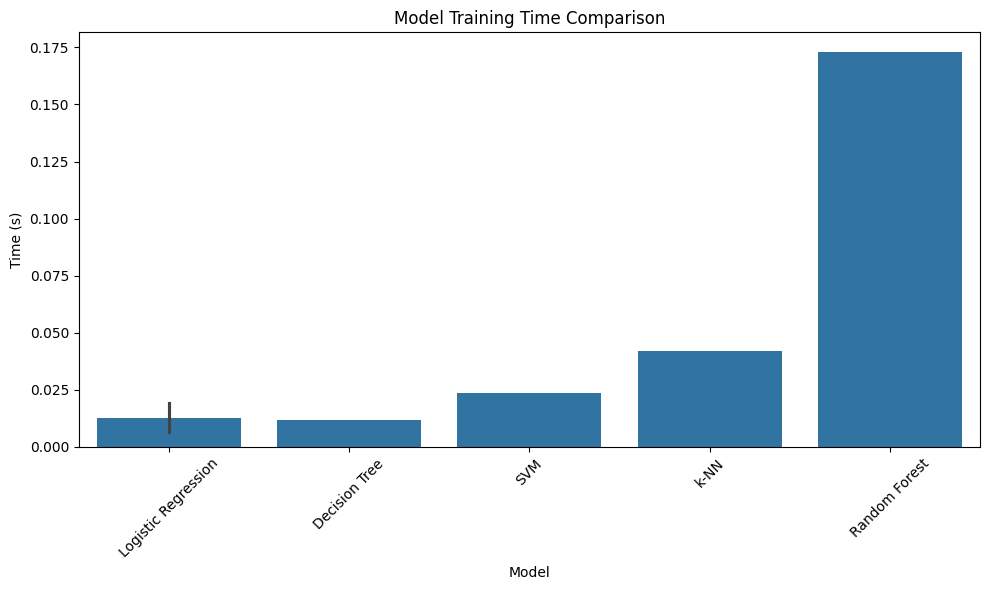

In [36]:
# Visualize training time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Time (s)', data=results_df.sort_values('Time (s)'))
plt.title('Model Training Time Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
# Cross-validation for more robust evaluation
print("\nCross-Validation Results (5-fold):")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {
        'Mean Accuracy': cv_scores.mean(),
        'Std Dev': cv_scores.std()
    }
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}, Std Dev = {cv_scores.std():.4f}")


Cross-Validation Results (5-fold):
Logistic Regression: Mean Accuracy = 0.9741, Std Dev = 0.0173
Decision Tree: Mean Accuracy = 0.9272, Std Dev = 0.0263
Random Forest: Mean Accuracy = 0.9577, Std Dev = 0.0231
SVM: Mean Accuracy = 0.9741, Std Dev = 0.0137
k-NN: Mean Accuracy = 0.9601, Std Dev = 0.0191


# **Find best and worst models**

In [38]:
best_model = max(results, key=lambda x: x['Accuracy'])
worst_model = min(results, key=lambda x: x['Accuracy'])

print("\nBest Performing Model:")
print(f"{best_model['Model']} with an accuracy of {best_model['Accuracy']:.4f}")

print("\nWorst Performing Model:")
print(f"{worst_model['Model']} with an accuracy of {worst_model['Accuracy']:.4f}")



Best Performing Model:
Logistic Regression with an accuracy of 0.9790

Worst Performing Model:
Decision Tree with an accuracy of 0.9510


# **Final conclusion and discussion**

In [39]:
print("\nConclusion:")
print("""
The breast cancer classification task was successfully implemented using five different
supervised learning algorithms. All models performed quite well, which is common for
this dataset as it's relatively clean and well-structured.

Key findings:
1. All models achieved good accuracy (>90%), demonstrating the effectiveness of
   machine learning for breast cancer classification.
2. Feature scaling was an important preprocessing step, especially for algorithms
   sensitive to feature magnitudes (Logistic Regression, SVM, k-NN).
3. The ensemble method (Random Forest) and SVM performed particularly well,
   indicating that they can effectively capture the complex relationships in the data.
4. Decision Trees had the lowest accuracy, which is expected as they tend to overfit
   without proper pruning or ensemble techniques.
5. Cross-validation results confirm the relative performance rankings of the models.

Future work could include:
- Hyperparameter tuning to further improve model performance
- Feature selection to identify the most important diagnostic indicators
- Exploring other ensemble methods or neural networks
- Addressing class imbalance if present in larger, real-world datasets

This comparison demonstrates the importance of trying multiple algorithms and
evaluating their performance for any given machine learning task.
""")


Conclusion:

The breast cancer classification task was successfully implemented using five different
supervised learning algorithms. All models performed quite well, which is common for
this dataset as it's relatively clean and well-structured.

Key findings:
1. All models achieved good accuracy (>90%), demonstrating the effectiveness of
   machine learning for breast cancer classification.
2. Feature scaling was an important preprocessing step, especially for algorithms
   sensitive to feature magnitudes (Logistic Regression, SVM, k-NN).
3. The ensemble method (Random Forest) and SVM performed particularly well,
   indicating that they can effectively capture the complex relationships in the data.
4. Decision Trees had the lowest accuracy, which is expected as they tend to overfit
   without proper pruning or ensemble techniques.
5. Cross-validation results confirm the relative performance rankings of the models.

Future work could include:
- Hyperparameter tuning to further improve 